## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#Scikit learn imports:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
from src.dataprep import prep_df

In [3]:
df = prep_df()

In [4]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 7)

In [5]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=5)

rf.fit(X_t, y_t)

print("Train:")
print(rf.score(X_t, y_t))
print("Val:")
print(rf.score(X_val, y_val))

Train:
0.8328888888888889
Val:
0.8097777777777778


In [6]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, max_features=5)

rf.fit(X_train, y_train)

print("Train:")
print(rf.score(X_train, y_train))
print("Val:")
print(rf.score(X_test, y_test))

Train:
0.8289777777777778
Val:
0.7960199004975125


[[931  86]
 [201 189]]


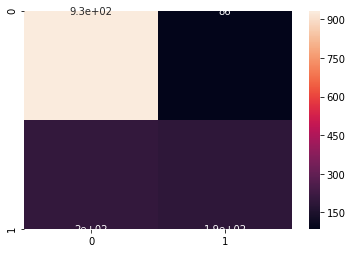

In [7]:
y_hat = rf.predict(X_test)
cf_mat = confusion_matrix(y_test, y_hat)
print(cf_mat)
sns.heatmap(cf_mat, annot=True)

And there we have it. Not quite 80% accuracy, but pretty darn close. 